In [5]:
import numpy as np
import pandas as pd
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


Accuracy of  poly kernel: 0.9936708860759493


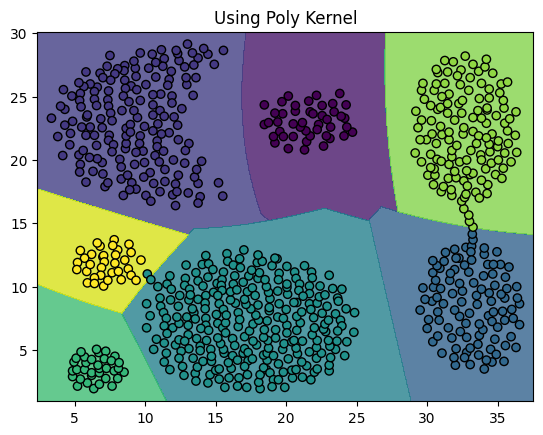

Accuracy of  rbf kernel: 0.9873417721518988


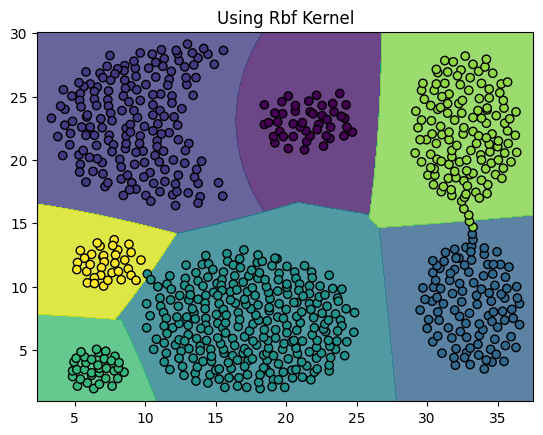

Accuracy of  linear kernel: 0.9873417721518988


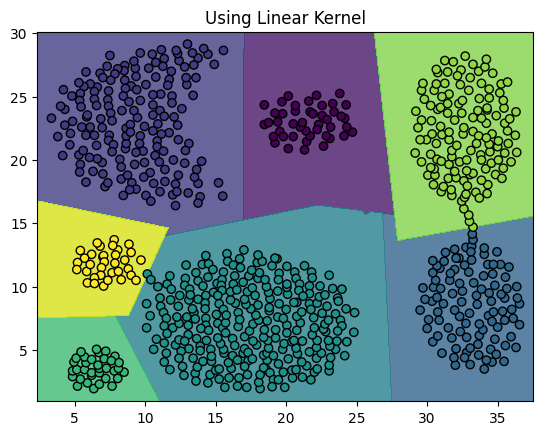

Accuracy of  poly kernel: 0.8875


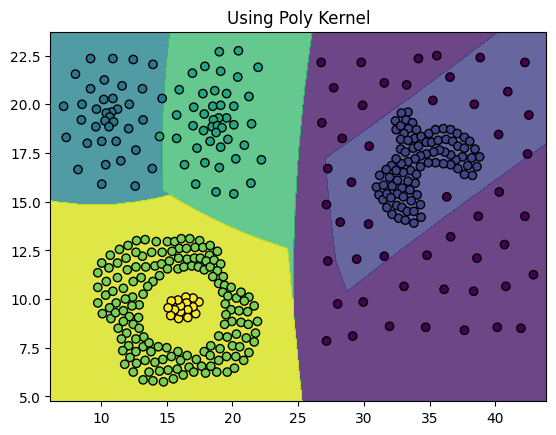

Accuracy of  rbf kernel: 0.9


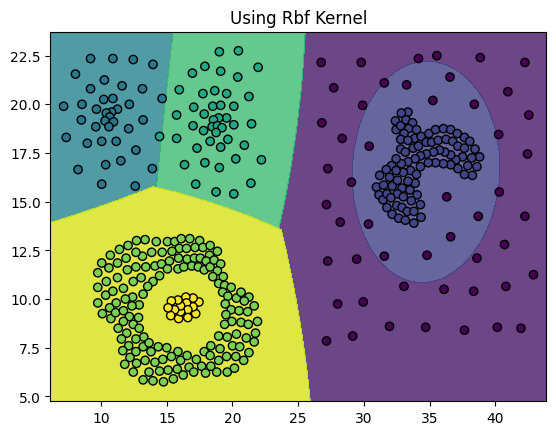

Accuracy of  linear kernel: 0.8875


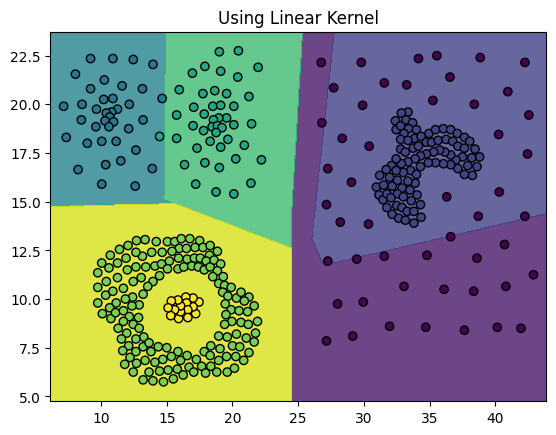

Accuracy of  poly kernel: 1.0


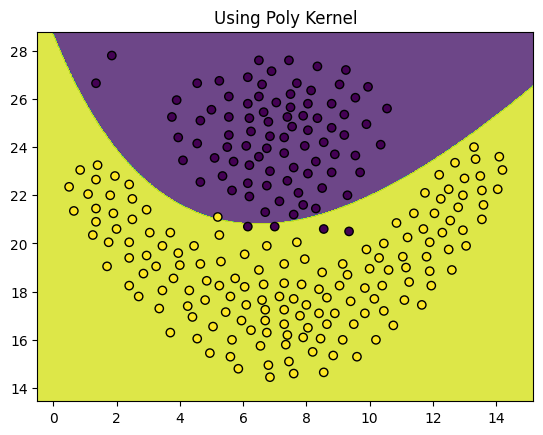

Accuracy of  rbf kernel: 1.0


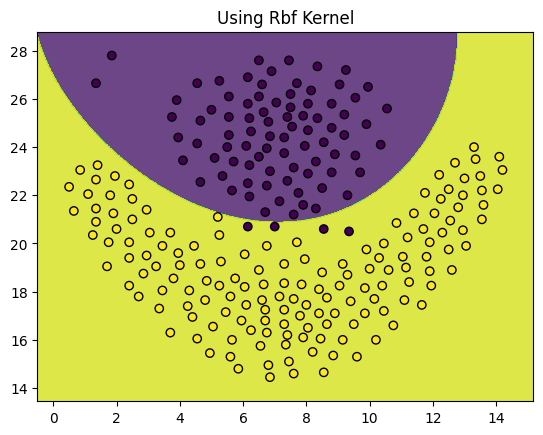

Accuracy of  linear kernel: 0.8958333333333334


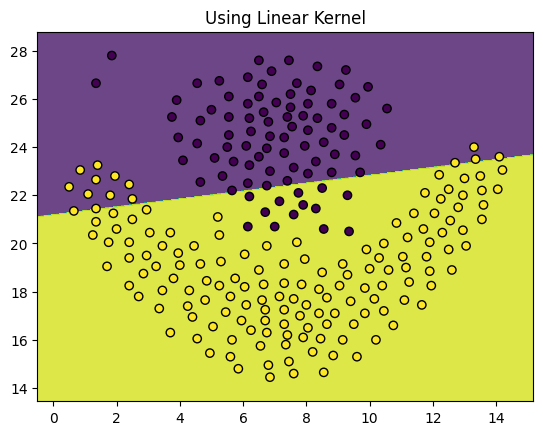

Accuracy of  poly kernel: 0.92


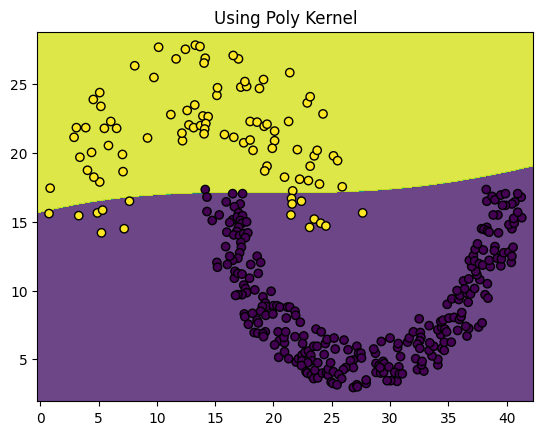

Accuracy of  rbf kernel: 0.9866666666666667


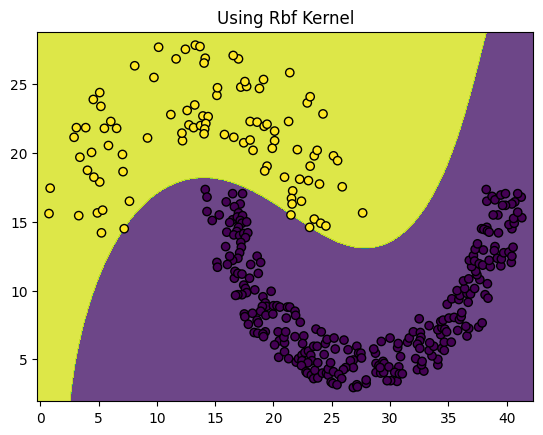

Accuracy of  linear kernel: 0.9466666666666667


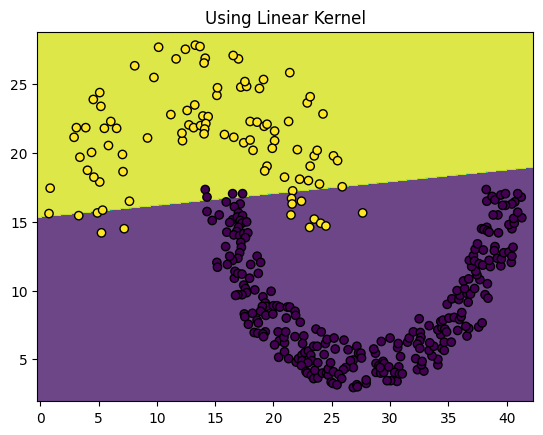

Accuracy of  poly kernel: 0.8


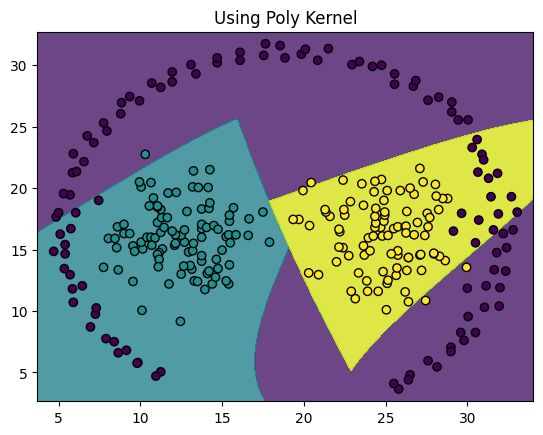

Accuracy of  rbf kernel: 0.9833333333333333


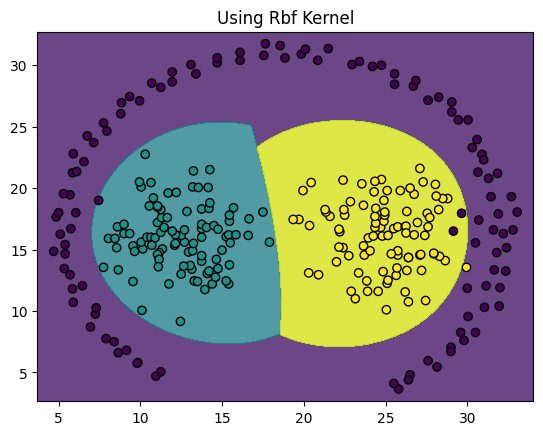

Accuracy of  linear kernel: 0.6666666666666666


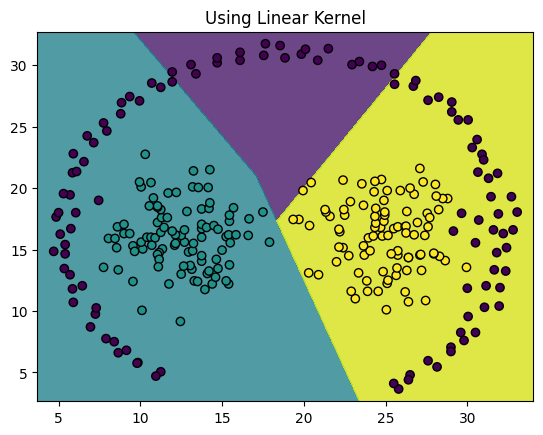

Accuracy of  poly kernel: 0.47619047619047616


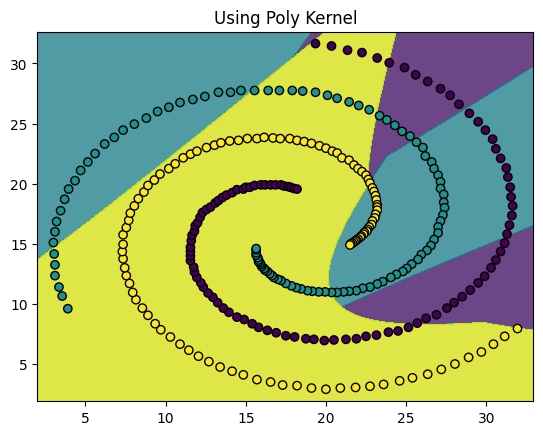

Accuracy of  rbf kernel: 1.0


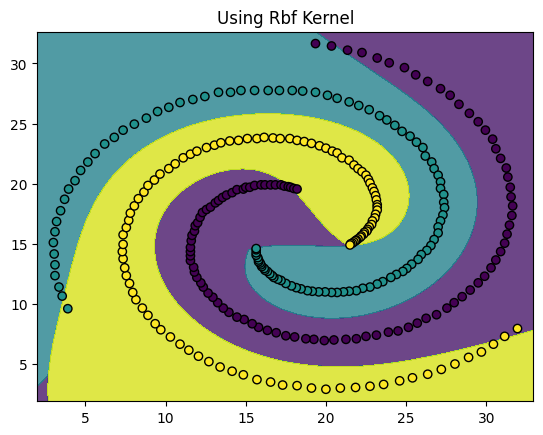

Accuracy of  linear kernel: 0.2698412698412698


In [ ]:

Datasets = [
    '/content/Aggregation.txt',
    '/content/Compound.txt',
    '/content/Flame.txt',
    '/content/Jain.txt',
    '/content/Pathbased.txt',
    '/content/Spiral.txt'
]

for i in Datasets:

    data = np.loadtxt(i, skiprows=7)
    X = data[:, :-1]
    y = data[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    kernel_types = [ 'poly','rbf', 'linear']

    for j in kernel_types:

        svm_model = SVC(kernel=j)
        svm_model.fit(X_train, y_train)


        #calculate Accuracy for each SVM model
        accuracy = svm_model.score(X_test, y_test)
        print(f"Accuracy of  {j} kernel:", accuracy)

        # Visualization
        plt.figure()
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

        Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
        plt.title(f'Using {j.capitalize()} Kernel')
        plt.show()